In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from IPython.display import display_markdown

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete=pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [53]:
# Checking the number of mice.
len(mouse_data_complete["Mouse ID"].unique())

249

In [54]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_cleaned=mouse_data_complete[mouse_data_complete.duplicated(subset=["Timepoint"])]

In [55]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data_cleaned["Mouse ID"].unique())

248

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_data_cleaned["Tumor Volume (mm3)"].describe()
tumor_volume_var=mouse_data_cleaned["Tumor Volume (mm3)"].var()
tumor_volume_sem=mouse_data_cleaned["Tumor Volume (mm3)"].sem()
tumor_volume_std=mouse_data_cleaned["Tumor Volume (mm3)"].std()

summary_table=pd.DataFrame({"Mean":[mouse_data_cleaned["Tumor Volume (mm3)"].mean()],
                            "Median":[mouse_data_cleaned["Tumor Volume (mm3)"].median()],
                            "Variance":[tumor_volume_var],
                            "Standard Deviation":[tumor_volume_std],
                            "SEM":[tumor_volume_sem],
                           })

summary_table.head()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_df=mouse_data_cleaned[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen')
drug_stats=pd.DataFrame()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_stats["Mean"] = drug_df.mean()["Tumor Volume (mm3)"]
drug_stats["Median"]=drug_df.median()["Tumor Volume (mm3)"]
drug_stats["Variance"]=drug_df.var()["Tumor Volume (mm3)"]
drug_stats["Standard Deviation"]=drug_df.std()["Tumor Volume (mm3)"]
drug_stats["SEM"]=drug_df.sem()["Tumor Volume (mm3)"]
# Assemble the resulting series into a single summary dataframe.
display_markdown("## Tumor Volume (mm3) by Drug",raw=True)
drug_stats





## Tumor Volume (mm3) by Drug

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.577199,41.020724,19.660760,4.434046,0.300311
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mice_by_id=mouse_data_cleaned[["Mouse ID", "Tumor Volume (mm3)"]].groupby("Mouse ID")
# Using the aggregation method, produce the same summary statistics in a single line
mice_by_id.agg(['mean','median','var','std','sem'])

Tumor Volume (mm3)                                          
                       mean     median        var       std       sem
Mouse ID                                                             
a203              56.312708  55.983272  50.407041  7.099792  2.245151
a251              55.237095  55.938620  51.740730  7.193103  2.274659
a262              58.611631  58.572588  84.759928  9.206515  2.911356
a275              52.770965  52.044750  36.322924  6.026850  1.905857
a366              54.639906  55.265582  38.415384  6.198015  2.342629
...                     ...        ...        ...       ...       ...
z435              46.942214  47.115980   3.464898  1.861424  1.074693
z578              38.411510  38.160380  17.969628  4.239060  1.340508
z581              53.979584  53.062175  29.827123  5.461421  1.727053
z795              54.880317  55.613879  53.416711  7.308674  2.311206
z969              60.194652  60.522215  94.626337  9.727607  3.076139

[248 rows x 5 columns]

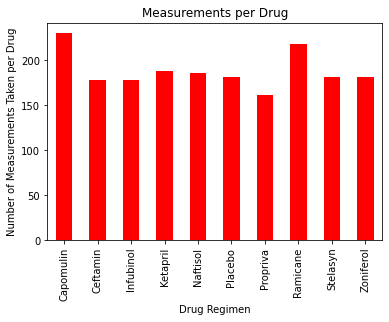

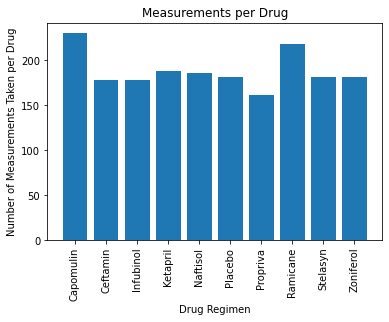

In [60]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_df.count()["Tumor Volume (mm3)"].plot(kind="bar", facecolor="red")
plt.ylabel("Number of Measurements Taken per Drug")
plt.title("Measurements per Drug")
plt.show()
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(drug_df.count().index, drug_df.count()["Tumor Volume (mm3)"])
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken per Drug")
plt.title("Measurements per Drug")
plt.xticks(rotation=90)
plt.show()


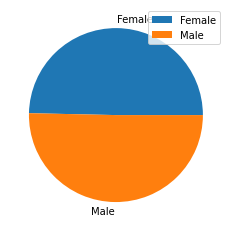

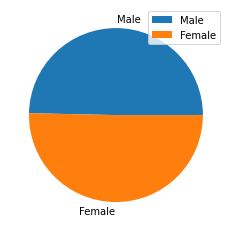

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_by_sex=mouse_data_cleaned[["Sex","Tumor Volume (mm3)"]].groupby("Sex").count()
mice_by_sex.plot.pie(y="Tumor Volume (mm3)", ylabel="")
plt.show()
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes=mice_by_sex["Tumor Volume (mm3)"]
labels=["Male","Female"]
plt.pie(sizes,labels=labels)
plt.legend(loc="best")
plt.show()